# Amazon web scraping and sentimental analysis

In [32]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests


In [33]:
#headers for scraping
header ={
       'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/Apple-iPhone-128GB-Product-RED/product-reviews/B0BDJVSDMY/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&pageNumber=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}
      


In [34]:
#placing the url 
url = 'https://www.amazon.in/Apple-iPhone-128GB-Product-RED/product-reviews/B0BDJVSDMY/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&pageNumber=1'

In [35]:
params = {'url':url,'wait':2}
r = requests.get(url,params)

In [36]:
soup = BeautifulSoup(r.text,'html.parser')

In [37]:
#creating empty url list
reviewlist = []

In [38]:
#defining soup to extract the url or html
def get_soup(url):
    params ={'url':url,'wait':2}
    r = requests.get(url,params)
    soup = BeautifulSoup(r.text,'html.parser')
    return soup
   


In [39]:
#finding all reviews from the initial page 
reviews = soup.find_all('div',{'data-hook':'review'})

In [40]:
#printing the titles extracted from the page
for item in reviews:
    print(item.find('a',{'data-hook':'review-title'}).text.strip())

Exceeding my expectation. Go for it.
Upgraded and happy
iPhone 14 is Awesome
Great
Pathetic exchange, Average phone
Awesome phone!!
Superhero
Happy customer
VERY CLASSIC
Awesome as usual,great battery 🔋 life


In [41]:
#storing our title  
title = item.find('a',{'data-hook':'review-title'}).text.strip()

In [42]:
#printing the ratings of all the reviews
for item in reviews:
    print(item.find('i',{'data-hook':'review-star-rating'}).text.strip())

5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
3.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars


In [43]:
#storing the ratings into a feature
ratings = float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip())

In [44]:
#printing the actual body or ontent in the reviews
for item in reviews:
    print(item.find('span',{'data-hook':'review-body'}).text.strip())

About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app store. If you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. They publish best application and the way the apps, its modules switches is just flawless. Due to the so called strict policy of privacy program with Apple products, iPhone can pop up a box in your screen if any apps wants to track your activity with other applications. +1 r

In [45]:
#storing our content into the body
body = item.find('span',{'data-hook':'review-body'}).text.strip()

In [46]:
#defining our review column to store all reviews in the list above
def get_reviews(soup):
    reviews = soup.find_all('div',{'data-hook':'review'})
    try:
    
        for item in reviews:
            
            review = {
                       
             'product':soup.title.text.replace('Amazon.in:Customer reviews:','').strip(),
             'title': item.find('a',{'data-hook':'review-title'}).text.strip(),
             'ratings': float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip()),
             'body': item.find('span',{'data-hook':'review-body'}).text.strip(),
            }
            
            reviewlist.append(review)
            
    except:
          pass
        
           
   
        
    
            
   


In [47]:
#storing reviews into list by extraction
soup = get_soup('https://www.amazon.in/Apple-iPhone-128GB-Product-RED/product-reviews/B0BDJVSDMY/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&pageNumber=1')

In [48]:
get_reviews(soup)

In [49]:
print(len(reviewlist))

10


In [50]:
print(reviewlist)

[{'product': 'Apple iPhone 14 128GB (Product) RED', 'title': 'Exceeding my expectation. Go for it.', 'ratings': 5.0, 'body': 'About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app store. If you are a developer you might know the app store policy for application publish and their security posture towards handling payment apps etc. They publish best application and the way the apps, its modules switches is just flawless. Due to the so called strict policy of privacy program with

In [51]:
#scraping for all the pages in the site
for x in range(1,10):
    soup = get_soup(f'https://www.amazon.in/Apple-iPhone-128GB-Product-RED/product-reviews/B0BDJVSDMY/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

20
30
40
50
60
70
80
90
100


In [137]:

import seaborn as sn 
from matplotlib.pyplot import imread
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import re
import string
from nltk import tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import Word
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS




In [72]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

True

In [52]:
#storing our values into dataframe and saving csv file 
df = pd.DataFrame(reviewlist)
df.to_csv('iphone_review.csv',index = False)


In [53]:
#reading our data
df

,product,title,ratings,body
0,Apple iPhone 14 128GB (Product) RED,Exceeding my expectation. Go for it.,5.0,About the phoneApple phone without a second de...
1,Apple iPhone 14 128GB (Product) RED,Upgraded and happy,5.0,I updated the iPhone 14 from iPhone 11.I excha...
2,Apple iPhone 14 128GB (Product) RED,iPhone 14 is Awesome,5.0,Better than Expectations
3,Apple iPhone 14 128GB (Product) RED,Great,5.0,"It’s IPhone, what else to say! The only thing ..."
4,Apple iPhone 14 128GB (Product) RED,"Pathetic exchange, Average phone",3.0,Planned for Amazon exchange and thought I will...
...,...,...,...,...
95,Apple iPhone 14 128GB (Product) RED,Wonderful product,5.0,"As all apple products, I phone 14 has much mor..."
96,Apple iPhone 14 128GB (Product) RED,Better to have 13 pro than 14,3.0,"If you wanna buy, then go for 14 pro or 13 pro..."
97,Apple iPhone 14 128GB (Product) RED,Awesome. Premium,4.0,Pros.Improved camera.Latest iOS 16 with resolv...
98,Apple iPhone 14 128GB (Product) RED,Awesome,5.0,"Looking for buying another, awesome product pe..."


# Data exploration

In [55]:
#checking with info ofour data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  100 non-null    object 
 1   title    100 non-null    object 
 2   ratings  100 non-null    float64
 3   body     100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [59]:
#checking with duplicated data 
df[df.duplicated()]

,product,title,ratings,body
10,Apple iPhone 14 128GB (Product) RED,Exceeding my expectation. Go for it.,5.0,About the phoneApple phone without a second de...
11,Apple iPhone 14 128GB (Product) RED,Upgraded and happy,5.0,I updated the iPhone 14 from iPhone 11.I excha...
12,Apple iPhone 14 128GB (Product) RED,iPhone 14 is Awesome,5.0,Better than Expectations
13,Apple iPhone 14 128GB (Product) RED,Great,5.0,"It’s IPhone, what else to say! The only thing ..."
14,Apple iPhone 14 128GB (Product) RED,"Pathetic exchange, Average phone",3.0,Planned for Amazon exchange and thought I will...
15,Apple iPhone 14 128GB (Product) RED,Awesome phone!!,5.0,Likes:1. The mobile is simply superb after yea...
16,Apple iPhone 14 128GB (Product) RED,Superhero,5.0,This is one of the all rounder excellent quali...
17,Apple iPhone 14 128GB (Product) RED,Happy customer,5.0,A product happy to acquire.
18,Apple iPhone 14 128GB (Product) RED,VERY CLASSIC,5.0,1) To use wired Headphone with adapter Bluetoo...
19,Apple iPhone 14 128GB (Product) RED,"Awesome as usual,great battery 🔋 life",5.0,"Loved it ,new colour is really special"


In [69]:
#dropping our duplicates 

df.drop_duplicates(inplace=True)
df.shape

(90, 4)

In [68]:
#we have no more duplicate data 
df[df.duplicated()]

,product,title,ratings,body


In [70]:
df.head()

,product,title,ratings,body
0,Apple iPhone 14 128GB (Product) RED,Exceeding my expectation. Go for it.,5.0,About the phoneApple phone without a second de...
1,Apple iPhone 14 128GB (Product) RED,Upgraded and happy,5.0,I updated the iPhone 14 from iPhone 11.I excha...
2,Apple iPhone 14 128GB (Product) RED,iPhone 14 is Awesome,5.0,Better than Expectations
3,Apple iPhone 14 128GB (Product) RED,Great,5.0,"It’s IPhone, what else to say! The only thing ..."
4,Apple iPhone 14 128GB (Product) RED,"Pathetic exchange, Average phone",3.0,Planned for Amazon exchange and thought I will...


In [83]:
#count for ratings
df.ratings.value_counts()

5.0    65
1.0    12
3.0     6
4.0     5
2.0     2
Name: ratings, dtype: int64

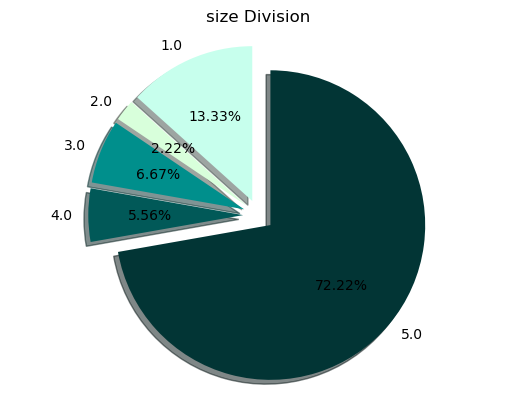

In [85]:
#distribution of ratings into pie chart
labels =['1.0','2.0','3.0','4.0','5.0']
colors =['#C7FFED','#D8FFDB','#008F8C','#015958','#023535']
sizes = [12,2,6,5,65]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1,0.1,0.1,0.1),autopct ='%1.2f%%')
plt.title('size Division')
plt.axis('equal')
plt.show()

we can observe that the ratings for the product is good and the percentage of consumer dispute with the product is lesser
with the product and sentiments towards the product is good

In [90]:
#feature rename 
df.rename({'body':'reviews'},axis=1,inplace=True)
df.head()

,product,title,ratings,reviews
0,Apple iPhone 14 128GB (Product) RED,Exceeding my expectation. Go for it.,5.0,About the phoneApple phone without a second de...
1,Apple iPhone 14 128GB (Product) RED,Upgraded and happy,5.0,I updated the iPhone 14 from iPhone 11.I excha...
2,Apple iPhone 14 128GB (Product) RED,iPhone 14 is Awesome,5.0,Better than Expectations
3,Apple iPhone 14 128GB (Product) RED,Great,5.0,"It’s IPhone, what else to say! The only thing ..."
4,Apple iPhone 14 128GB (Product) RED,"Pathetic exchange, Average phone",3.0,Planned for Amazon exchange and thought I will...


#  Text Preprocessing

In [142]:
data = df[['reviews']]
data

,reviews
0,About the phoneApple phone without a second de...
1,I updated the iPhone 14 from iPhone 11.I excha...
2,Better than Expectations
3,"It’s IPhone, what else to say! The only thing ..."
4,Planned for Amazon exchange and thought I will...
...,...
95,"As all apple products, I phone 14 has much mor..."
96,"If you wanna buy, then go for 14 pro or 13 pro..."
97,Pros.Improved camera.Latest iOS 16 with resolv...
98,"Looking for buying another, awesome product pe..."


In [143]:
stop_words = stopwords.words('english')
data['reviews']= data['reviews'].apply(lambda x: " ".join(x.lower()for x in str(x).split()\
                                                       if x not in stop_words))

In [144]:

data

,reviews
0,"about phoneapple phone without second delay, i..."
1,i updated iphone 14 iphone 11.i exchange old p...
2,better expectations
3,"it’s iphone, else say! the thing i worried 60 ..."
4,planned amazon exchange thought i try iphone i...
...,...
95,"as apple products, i phone 14 much increased b..."
96,"if wanna buy, go 14 pro 13 pro max. no use buy..."
97,pros.improved camera.latest ios 16 resolved bu...
98,"looking buying another, awesome product perfec..."


In [145]:
data[data.duplicated()]

,reviews
39,
50,the media could loaded.
56,
58,nice
66,
88,
93,


In [146]:
data.drop_duplicates(inplace=True)
data.shape

(83, 1)

In [147]:
#removing leading and trailing characters 
data = [reviews.strip()for reviews in data.reviews]
data = [reviews for reviews in data if reviews]
data[0:5]

['about phoneapple phone without second delay, i would say better android phones i used. the phone like water, flows way want shaping way. in best way possible, phone designed show user wants eliminating unnecessary ads, features i seen android.why better android?you pay much money apple products, obviously experience features, physical components , camera lens etc. apart basic things, also enjoy best applications available app store. if developer might know app store policy application publish security posture towards handling payment apps etc. they publish best application way apps, modules switches flawless. due called strict policy privacy program apple products, iphone pop box screen apps wants track activity applications. +1 respect apple show concern user.apple phones ? like 13 vs 14the reason 14 13 may business practice followed 11th edition. but please note iphone making changes internally like physical components (small change battery performance, lens 14 edition), additional

In [150]:
#joining list into one string or text 
reviews_text = ' '.join(data)
reviews_text[0:100]

'about phoneapple phone without second delay, i would say better android phones i used. the phone lik'

In [154]:
#remove puctuations 
no_punc_text = reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:200]

'about phoneapple phone without second delay i would say better android phones i used the phone like water flows way want shaping way in best way possible phone designed show user wants eliminating unn'

In [159]:
#tokenization
text_token = word_tokenize(no_punc_text)
text_token[0:10]


['about',
 'phoneapple',
 'phone',
 'without',
 'second',
 'delay',
 'i',
 'would',
 'say',
 'better']

In [184]:
#remove stopwords 
my_stopwords = stopwords.words('english')
sw_list = ['a','an','i','you','your','it','its','there','that','almost','everything','why','etc']
my_stopwords.extend(sw_list)

no_stop_tokens = [word for word in text_token if not word in my_stopwords ]
no_stop_tokens[0:50]


['phoneapple',
 'phone',
 'without',
 'second',
 'delay',
 'would',
 'say',
 'better',
 'android',
 'phones',
 'used',
 'phone',
 'like',
 'water',
 'flows',
 'way',
 'want',
 'shaping',
 'way',
 'best',
 'way',
 'possible',
 'phone',
 'designed',
 'show',
 'user',
 'wants',
 'eliminating',
 'unnecessary',
 'ads',
 'features',
 'seen',
 'androidwhy',
 'better',
 'androidyou',
 'pay',
 'much',
 'money',
 'apple',
 'products',
 'obviously',
 'experience',
 'features',
 'physical',
 'components',
 'camera',
 'lens',
 'apart',
 'basic',
 'things']

In [201]:
#stemming (just for understanding and comparison to lemmatization)
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word)for word in no_stop_tokens]
stemmed_tokens[0:10]

['phoneappl',
 'phone',
 'without',
 'second',
 'delay',
 'would',
 'say',
 'better',
 'android',
 'phone']

In [198]:
#lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(no_stop_tokens))
doc[0:10]

phoneapple phone without second delay would say better android phones

In [200]:
lemmas = [token.lemma_ for token in doc]
lemmas[0:10]

['phoneapple',
 'phone',
 'without',
 'second',
 'delay',
 'would',
 'say',
 'well',
 'android',
 'phone']

In [203]:
clean_reviews = ' '.join(lemmas)
clean_reviews[0:100]

'phoneapple phone without second delay would say well android phone use phone like water flow way wan'

# Feature Extraction

1)Count Vectorizer

In [204]:
cv = CountVectorizer()
X = cv.fit_transform(lemmas)

In [205]:
#printing our vocabulary 
print(cv.vocabulary_)

{'phoneapple': 415, 'phone': 414, 'without': 631, 'second': 506, 'delay': 158, 'would': 640, 'say': 502, 'well': 626, 'android': 45, 'use': 608, 'like': 326, 'water': 622, 'flow': 228, 'way': 623, 'want': 620, 'shape': 519, 'good': 254, 'possible': 430, 'design': 161, 'show': 522, 'user': 609, 'eliminate': 185, 'unnecessary': 600, 'ad': 29, 'feature': 215, 'see': 508, 'androidwhy': 47, 'androidyou': 48, 'pay': 404, 'much': 359, 'money': 354, 'apple': 54, 'product': 449, 'obviously': 380, 'experience': 203, 'physical': 419, 'component': 132, 'camera': 102, 'lens': 320, 'apart': 52, 'basic': 75, 'thing': 574, 'also': 39, 'enjoy': 189, 'application': 56, 'available': 64, 'app': 53, 'store': 551, 'developer': 164, 'might': 346, 'know': 314, 'policy': 427, 'publish': 454, 'security': 507, 'posture': 431, 'towards': 582, 'handle': 263, 'payment': 405, 'module': 353, 'switch': 564, 'flawless': 225, 'due': 176, 'call': 101, 'strict': 552, 'privacy': 445, 'program': 450, 'iphone': 300, 'pop': 4

In [206]:
#selecting our top features 
print(cv.get_feature_names()[100:200])

['buying', 'call', 'camera', 'cameralat', 'cameralove', 'can', 'carbon', 'card', 'care', 'carei', 'case', 'caseapple', 'center', 'change', 'changer', 'charge', 'charger', 'cheap', 'check', 'chip', 'cinematic', 'claim', 'classic', 'classy', 'clear', 'color', 'colour', 'colouronce', 'come', 'compare', 'comparison', 'complain', 'component', 'computer', 'concern', 'connectivity', 'content', 'continue', 'control', 'cool', 'cool4', 'corporate', 'cost', 'could', 'crash', 'crazy', 'customer', 'customizable', 'daily', 'damage', 'day', 'deal', 'dealer', 'december', 'decent', 'defect', 'defective', 'definitely', 'delay', 'delivery', 'den', 'design', 'detectionimprovement', 'determined', 'developer', 'device', 'difference', 'different', 'digital', 'dis', 'disappoint', 'disappointed', 'disasteramazon', 'discount', 'display', 'do', 'due', 'durability', 'dusre', 'dynamic', 'ear', 'early', 'easy', 'edge', 'edition', 'eliminate', 'else', 'email', 'end', 'enjoy', 'enter', 'etc', 'eu', 'even', 'every', '

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [209]:
print(X.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [210]:
print(X.toarray().shape)

(1430, 651)


Count Vectorizer with N-grams (Bigrams and Trigrams)

In [212]:
#fitting our unigram,bigram and trigram
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [213]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['13', '14', 'add', 'additional', 'also', 'amazing', 'amazon', 'android', 'app', 'apple', 'application', 'awesome', 'bad', 'battery', 'blue', 'build', 'buy', 'camera', 'center', 'change', 'charge', 'charger', 'cinematic', 'colour', 'come', 'could', 'day', 'design', 'difference', 'edition', 'else', 'even', 'excellent', 'exchange', 'experience', 'extra', 'fabulous', 'feature', 'feel', 'find', 'first', 'get', 'give', 'go', 'good', 'great', 'hai', 'instead', 'iphone', 'life', 'like', 'look', 'love', 'low', 'make', 'may', 'mobile', 'mode', 'model', 'much', 'network', 'new', 'nice', 'old', 'one', 'pay', 'performance', 'phone', 'physical', 'policy', 'price', 'product', 'purchase', 'quality', 'really', 'refuse', 'replace', 'return', 'samsung', 'say', 'screen', 'see', 'series', 'service', 'show', 'store', 'super', 'switch', 'thing', 'think', 'time', 'upgrade', 'use', 'version', 'wait', 'want', 'way', 'well', 'worth', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TFIDF-Vectorizer(term frequency inverse document frequency)

In [215]:
#fittin or vectorizer 
#fitting our unigram,bigram and trigram
tfidf_ngram_max_feat = TfidfVectorizer(norm ='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram = tfidf_ngram_max_feat.fit_transform(lemmas)

In [217]:
print(tfidf_ngram_max_feat.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['100', '10k', '11', '11i', '11th', '120', '13', '13better', '13consold', '13pro', '14', '14the', '16', '17k', '1st', '2022', '2023', '256', '48', '5gbetter', '60', '7k', '80k', 'a15', 'absolutely', 'accept', 'acquire', 'action', 'activity', 'ad', 'adapter', 'adaptor', 'add', 'additional', 'advanced', 'airtel', 'alert', 'along', 'already', 'also', 'amaze', 'amazing', 'amazon', 'among', 'amount', 'android', 'androidoverall', 'androidwhy', 'androidyou', 'apart', 'app', 'apple', 'application', 'available', 'awesome', 'back', 'bad', 'bahut', 'batter', 'battery', 'beautiful', 'big', 'bind', 'bionic', 'bit', 'blue', 'bluetooth', 'bluetoothbetter', 'bother', 'box', 'brand', 'browhat', 'browsersafe', 'bud', 'budget', 'bugscompact', 'build', 'business', 'butter', 'buy', 'buying', 'call', 'camera', 'cameralat', 'cameralove', 'can', 'carbon', 'card', 'care', 'carei', 'case', 'caseapple', 'center', 'change', 'changer', 'charge', 'charger', 'cheap', 'check', 'chip', 'cinematic', 'claim', 'classic',

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Wordcloud

In [218]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

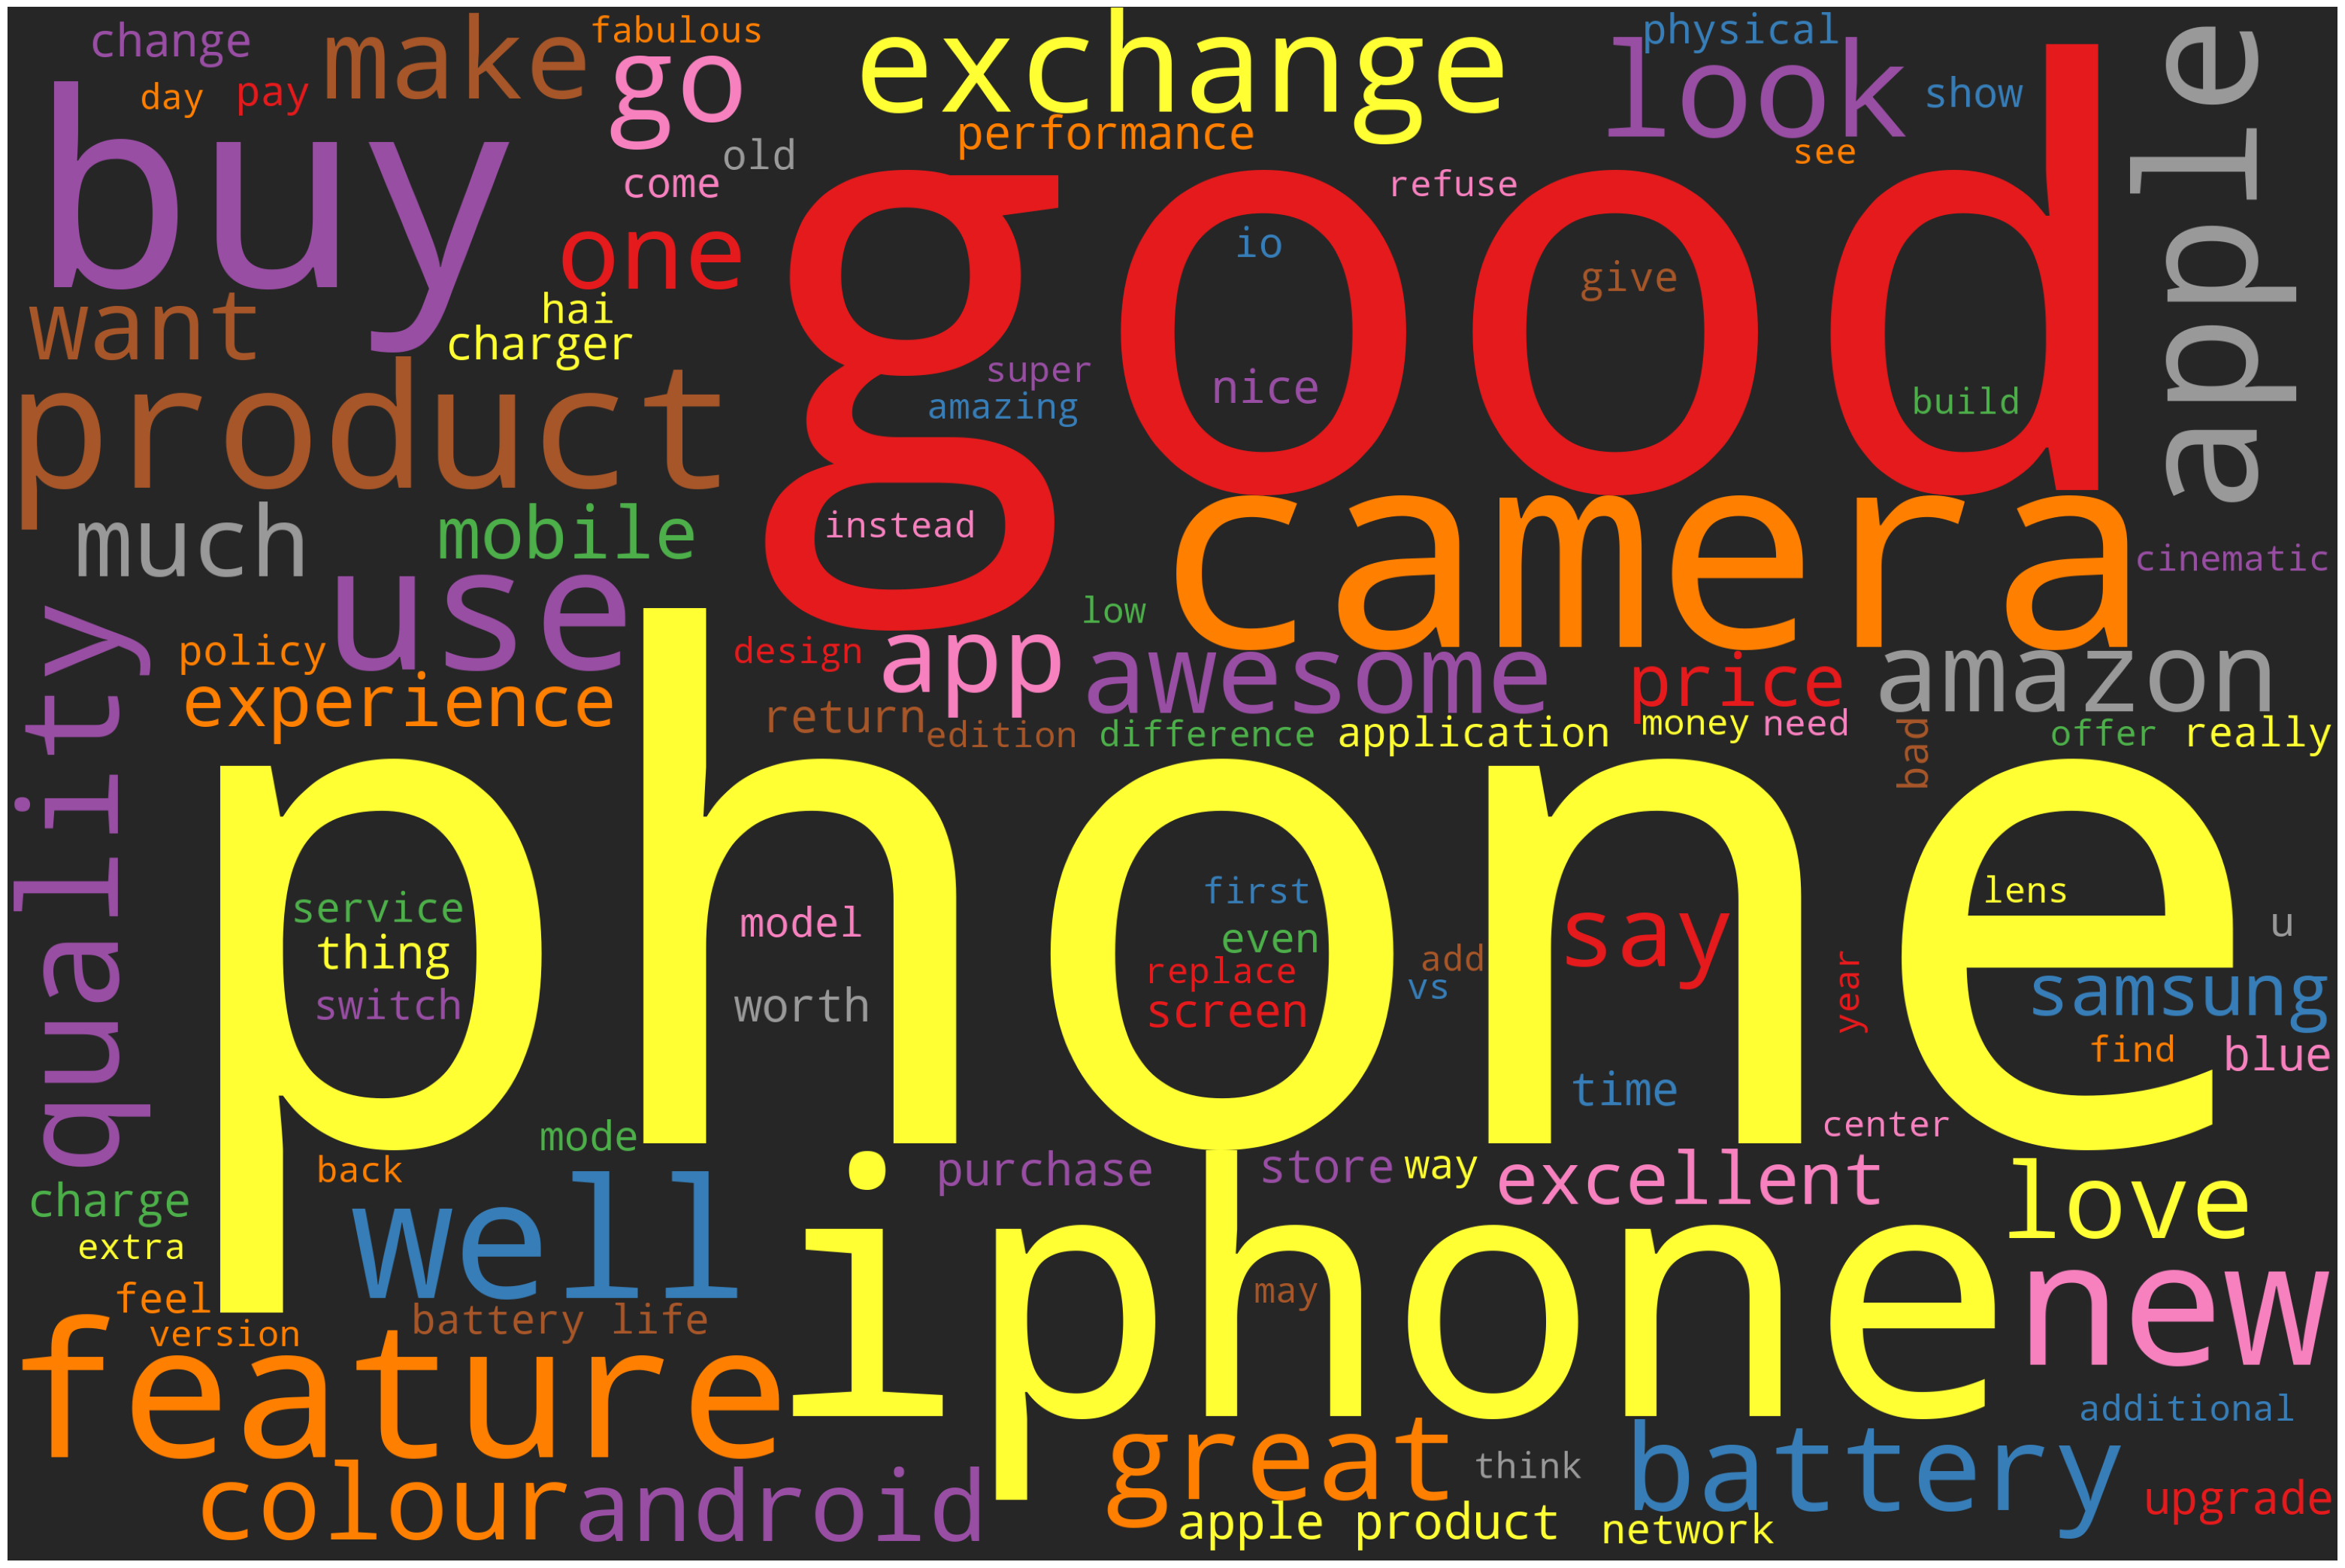

In [233]:
stopwords = STOPWORDS
stopwords.add('pron')


wordcloud = WordCloud(width= 3000, height= 2000,background_color='#262626',max_words=100,
                     colormap='Set1',stopwords=STOPWORDS,contour_color='black',contour_width=2).generate(clean_reviews)
plot_cloud(wordcloud)

Named Entity recognition

In [235]:
#parts of speech tagging 
nlp = spacy.load('en_core_web_sm')
one_block = clean_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter = True)

In [236]:
#printing parts of speech
for token in doc_block[100:200]:
    print(token,token.pos_)

concern NOUN
userapple ADJ
phone NOUN
like ADP
13 NUM
vs ADP
14the ADJ
reason NOUN
14 NUM
13 NUM
may AUX
business NOUN
practice NOUN
follow NOUN
11th NOUN
edition NOUN
please INTJ
note VERB
iphone NOUN
make VERB
change NOUN
internally ADV
like ADP
physical ADJ
component NOUN
small ADJ
change NOUN
battery NOUN
performance NOUN
lens NOUN
14 NUM
edition NOUN
additional ADJ
feature NOUN
may AUX
satisfy VERB
buy VERB
14 NUM
edition NOUN
find VERB
change NOUN
interesting ADJ
14 NUM
go VERB
13 NUM
physical ADJ
even ADV
camera NOUN
visually ADV
much ADV
different ADJ
13 NUM
vs ADP
14 NUM
comparison NOUN
also ADV
get VERB
13 NUM
cheap ADJ
14 NUM
add VERB
feature NOUN
daily ADJ
use NOUN
feature NOUN
real ADJ
time NOUN
use VERB
rare ADJ
case NOUN
good ADJ
part NOUN
extra ADJ
cost NOUN
13 NUM
vs ADP
14 NUM
price NOUN
except SCONJ
extra ADJ
10k NOUN
slashconcern ADJ
must AUX
haveapple ADV
give VERB
charger NOUN
silicon NOUN
case NOUN
expensive ADJ
good ADJ
touch NOUN
scratch NOUN
friendly ADJ
back 

In [238]:
#filtering only nouns , verbs 
nouns_verbs = [token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[100:200])

['get', 'add', 'feature', 'use', 'feature', 'time', 'use', 'case', 'part', 'cost', 'price', '10k', 'give', 'charger', 'silicon', 'case', 'touch', 'scratch', 'silk', 'layer', 'issue', 'buy', 'charger', 'come', 'c', 'claim', 'help', 'carbon', 'footprint', 'customer', 'business', 'model', 'purchase', 'spend', 'charger', 'buying', 'pay', 'phone', 'premium', 'apple', 'care', 'policy', 'understand', 'waste', 'find', 'insurance', 'make', 'thing', 'update', 'iphone', 'iphone', '11i', 'exchange', 'phone', 'get', 'phone', 'priceit', 'build', 'fastand', 'get', 'price', 'exchange', 'camera', 'expectation', 'iphone', 'say', 'thing', 'worry', 'hz', 'rate', 'switch', 'phone', 'trust', 'difference', 'think', 'issue', 'plan', 'think', 'try', 'iphone', 'iphone', 'exchange', 'turn', 'delivery', 'guy', 'seem', 'accept', 'phone', 'want', 'remove', 'temper', 'glass', 'check', 'screen', 'enter', 'number', 'phone', 'mobile', 'say', 'system']


In [239]:
#counting nouns,verbs and adjectives 

cv = CountVectorizer()
X2 = cv.fit_transform(nouns_verbs)
sum_words = X2.sum(axis = 0)

words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:11] #viewing top 10 verbs.nouns 

,word,count
0,phone,47
1,iphone,25
2,camera,21
3,buy,20
4,product,18
5,apple,16
6,feature,14
7,use,12
8,battery,12
9,quality,11


<AxesSubplot:title={'center':'top 10 verbs and nouns'}, xlabel='word'>

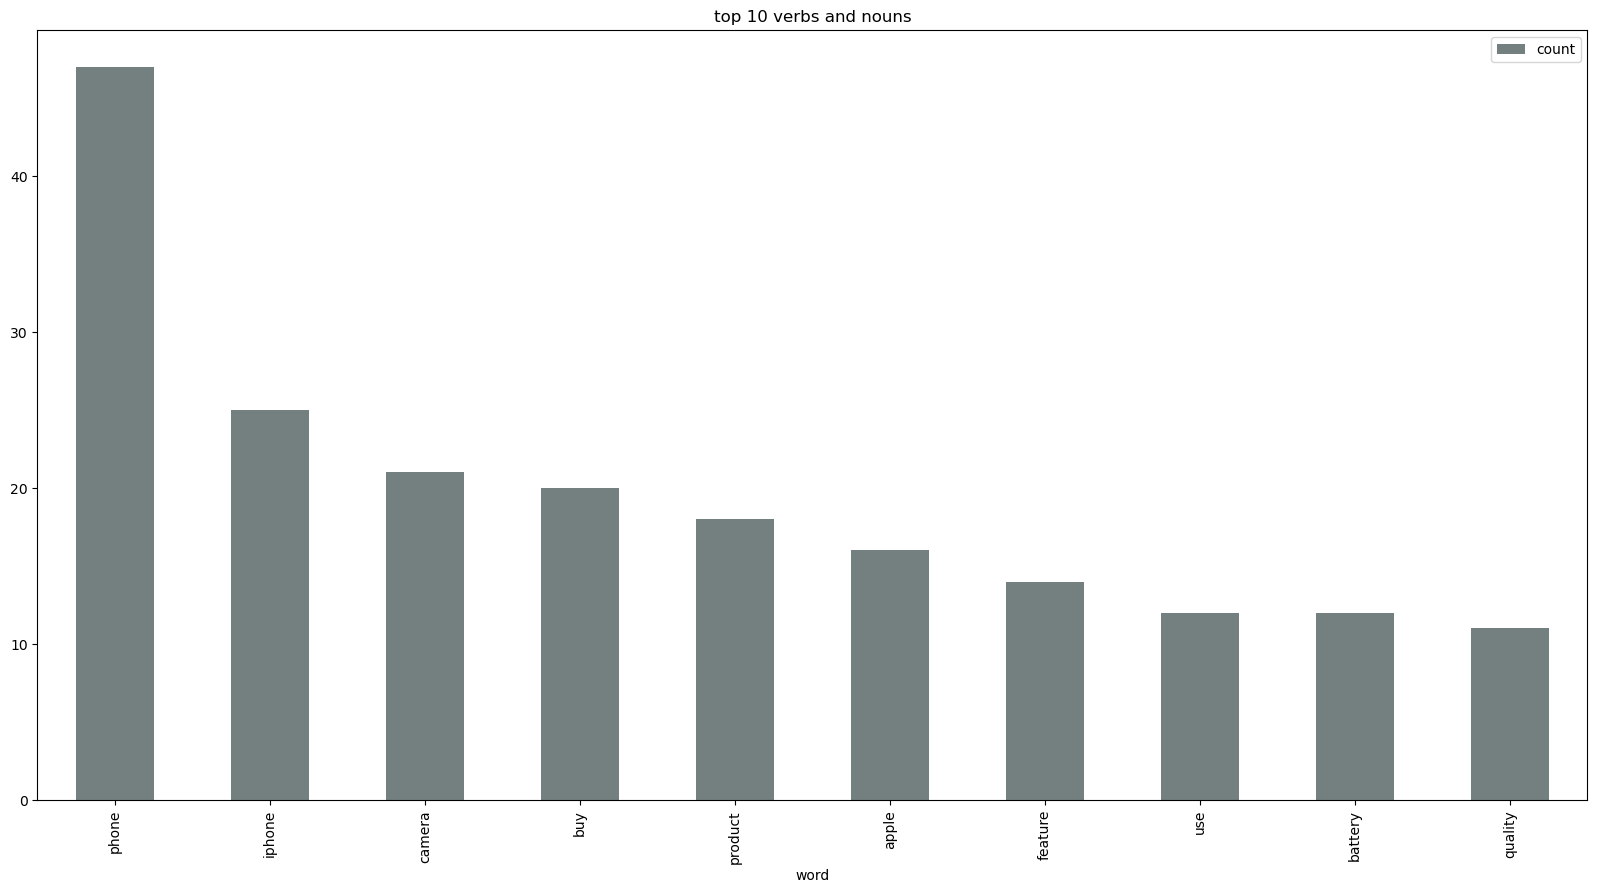

In [240]:
#visualizing our results on barplot 
wd_df[0:10].plot.bar(x = 'word',figsize =(20,10),title = 'top 10 verbs and nouns',color = '#747F7F')

# Emotion Mining - Sentimental Analysis

In [241]:
sentences =  tokenize.sent_tokenize(' '.join(data))
sentences[0:10]

['about phoneapple phone without second delay, i would say better android phones i used.',
 'the phone like water, flows way want shaping way.',
 'in best way possible, phone designed show user wants eliminating unnecessary ads, features i seen android.why better android?you pay much money apple products, obviously experience features, physical components , camera lens etc.',
 'apart basic things, also enjoy best applications available app store.',
 'if developer might know app store policy application publish security posture towards handling payment apps etc.',
 'they publish best application way apps, modules switches flawless.',
 'due called strict policy privacy program apple products, iphone pop box screen apps wants track activity applications.',
 '+1 respect apple show concern user.apple phones ?',
 'like 13 vs 14the reason 14 13 may business practice followed 11th edition.',
 'but please note iphone making changes internally like physical components (small change battery perfo

In [253]:
#storing sentences into dataframe
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"about phoneapple phone without second delay, i..."
1,"the phone like water, flows way want shaping way."
2,"in best way possible, phone designed show user..."
3,"apart basic things, also enjoy best applicatio..."
4,if developer might know app store policy appli...
...,...
95,pros.improved camera.latest ios 16 resolved bu...
96,sound quality perfect too.
97,waiting discount.
98,peace it's great phone i love & first iphone m...


In [244]:
#importing our dictionary for sentimental analysis
affin = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\class assignments\Afinn.csv",sep =',',encoding ='Latin-1')

In [245]:
#dictionary
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [248]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [249]:
#calculate the score for the whole original sentence 
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str= None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
            
        return sent_score
           

In [251]:
#manual testing 
calculate_sentiment(text = 'worst')

-3

In [254]:
#calculating sentiment value for each sentence 
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     -1
1      3
2      3
3      5
4      0
      ..
95     6
96     3
97     0
98    12
99     0
Name: sentiment_value, Length: 100, dtype: int64

In [255]:
#checking number of words in the sentence 
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     14
1      9
2     32
3     10
4     16
      ..
95    24
96     4
97     2
98    21
99     2
Name: word_count, Length: 100, dtype: int64

In [256]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
62,you may urge return item unboxing crazy hangin...,-5,66
85,it fraud.,-4,2
31,i little bit worried i saw that.2.,-3,7
82,i bought reliance digital return policy sucks.,-3,7
71,had bad experience bought 2 phones together on...,-3,18
...,...,...,...
49,genuine product good fantastic 👍 this 1st ipho...,21,20
91,new phone new feels..love apple make phone loo...,22,55
89,display amazing video recording cinematic mode...,23,29
58,value money nice i going buy iphone 13 first w...,30,53


In [257]:
#sentiment descriptive statistics 
sent_df['sentiment_value'].describe()

count    100.000000
mean       3.500000
std        6.890925
min       -5.000000
25%        0.000000
50%        1.500000
75%        4.000000
max       38.000000
Name: sentiment_value, dtype: float64

In [261]:
#negative sentiment score of the whole review 
 
sent_df[sent_df['sentiment_value']<0]



,sentence,sentiment_value,word_count
0,"about phoneapple phone without second delay, i...",-1,14
19,the thing i worried 60 hz refresh rate switchi...,-1,17
24,he entered incorrect imei number phone mobile ...,-2,14
30,multitasking superb.dislike:1. the first day p...,-1,17
31,i little bit worried i saw that.2.,-3,7
33,control center customizable limited apps.4.,-1,5
40,old phone made prior ready else exchange bound...,-2,9
41,pick-up person utmost tries refuse exchange sl...,-2,8
62,you may urge return item unboxing crazy hangin...,-5,66
63,amazon failed accept replacement.,-1,4


In [260]:
#positive sentiment score of the whole review 
 
sent_df[sent_df['sentiment_value']>0]


,sentence,sentiment_value,word_count
1,"the phone like water, flows way want shaping way.",3,9
2,"in best way possible, phone designed show user...",3,32
3,"apart basic things, also enjoy best applicatio...",5,10
5,"they publish best application way apps, module...",3,9
6,due called strict policy privacy program apple...,1,17
8,like 13 vs 14the reason 14 13 may business pra...,2,13
9,but please note iphone making changes internal...,3,24
10,"if find ""the changes"" interesting 14, go 13. b...",2,19
12,but best part extra cost 13 vs 14 prices (exce...,8,29
14,you buy charger coming usb c claiming help car...,4,15


In [276]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"about phoneapple phone without second delay, i...",-1,14,0
1,"the phone like water, flows way want shaping way.",3,9,1
2,"in best way possible, phone designed show user...",3,32,2
3,"apart basic things, also enjoy best applicatio...",5,10,3
4,if developer might know app store policy appli...,0,16,4
...,...,...,...,...
95,pros.improved camera.latest ios 16 resolved bu...,6,24,95
96,sound quality perfect too.,3,4,96
97,waiting discount.,0,2,97
98,peace it's great phone i love & first iphone m...,12,21,98


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

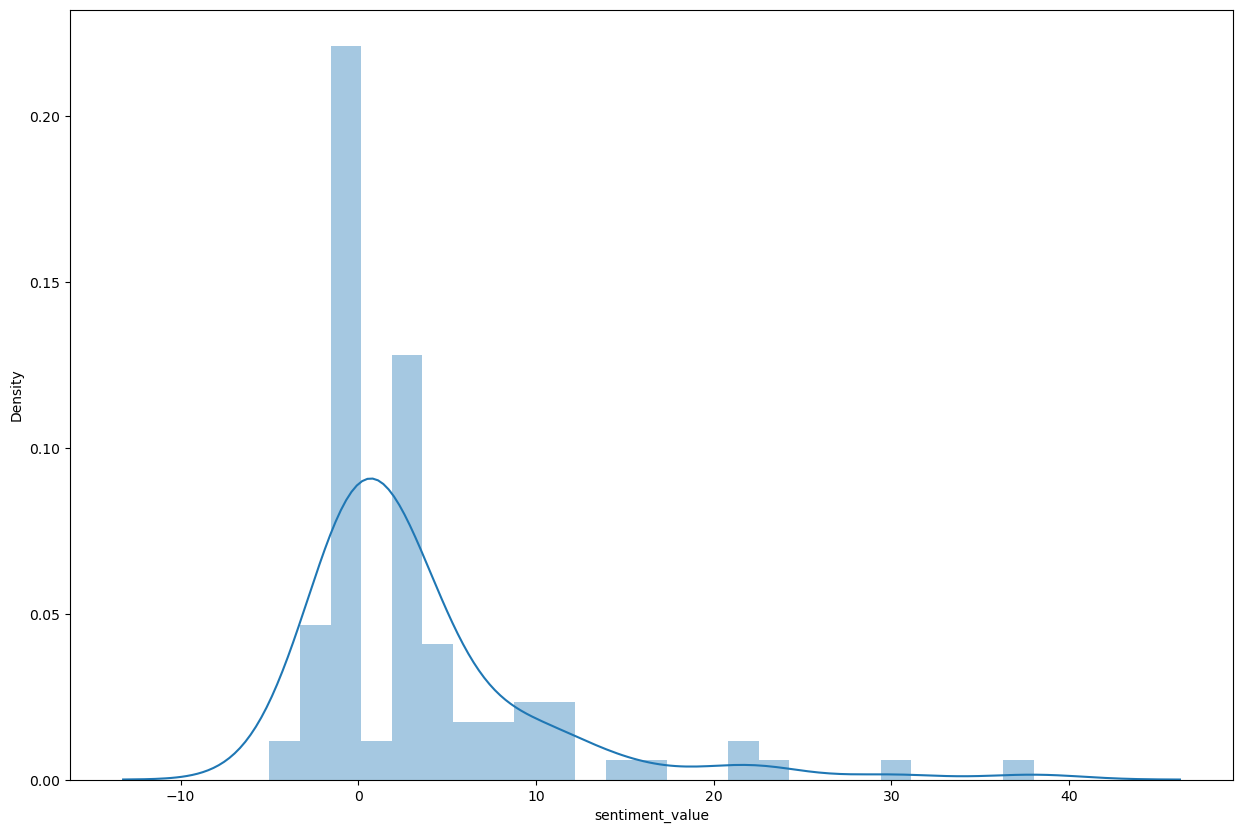

In [272]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

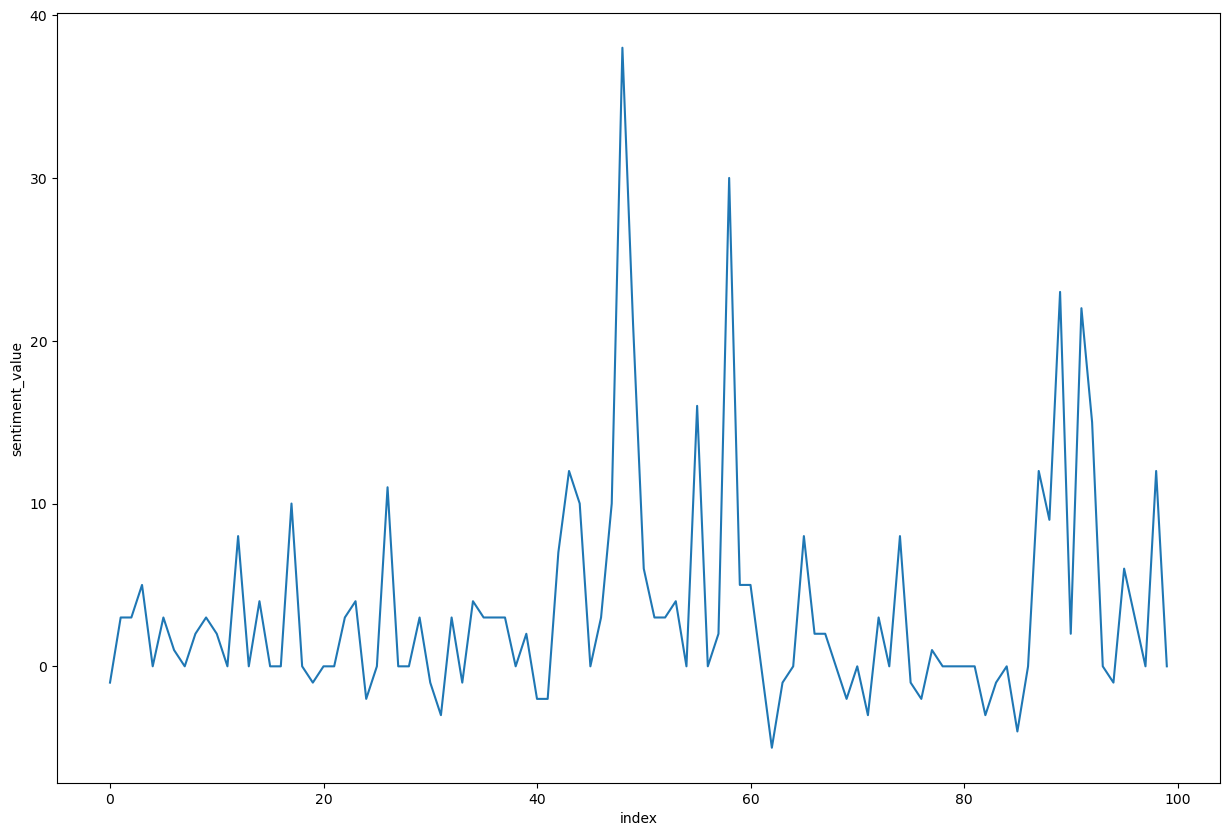

In [277]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sn.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

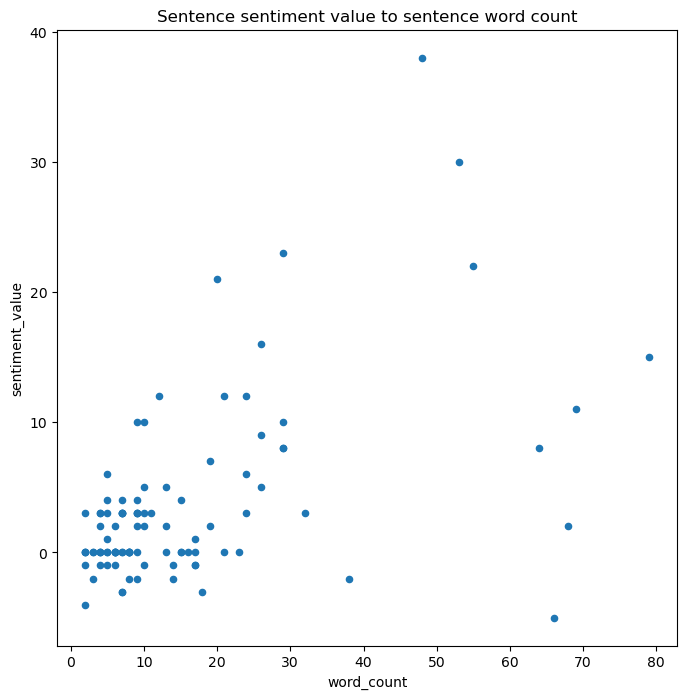

In [278]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

Conclusions


1)NLP is case sensitive so all the corpus has to be transformed into lower cases 

2)while performing process of stemming  we observe that words are broken into irrelevant chunks and dont give us 
semantic meaning

3)lemmatization uses its own dictionary which convert well and help us in understanding corpus well 

4)We observe that reviews for iphone has positive views than negative views and the consumer dispute is lesser, the marjin of sales is higher and people love the product
